# Prepare data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import math

In [ ]:
import pandas as pd

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_S6vvCQYgSZFiPqx-QP6K3VmHEvZSyIj' -O 'ds05.zip'
!mkdir dataset

--2024-01-04 09:24:04--  https://docs.google.com/uc?export=download&id=1_S6vvCQYgSZFiPqx-QP6K3VmHEvZSyIj
Resolving docs.google.com (docs.google.com)... 173.194.203.101, 173.194.203.100, 173.194.203.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0rcbfk0sn955q334t691ldooouodkv9j/1704360225000/08868274552612749804/*/1_S6vvCQYgSZFiPqx-QP6K3VmHEvZSyIj?e=download&uuid=c1cfa270-0b38-4729-9334-1e9b6b55e8c1 [following]
--2024-01-04 09:24:06--  https://doc-10-9s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0rcbfk0sn955q334t691ldooouodkv9j/1704360225000/08868274552612749804/*/1_S6vvCQYgSZFiPqx-QP6K3VmHEvZSyIj?e=download&uuid=c1cfa270-0b38-4729-9334-1e9b6b55e8c1
Resolving doc-10-9s-docs.googleusercontent.com (doc-10-9s-docs.googleusercontent.com)... 142.250.99.132, 2607:f

# Data Loading

In [ ]:
import zipfile


with zipfile.ZipFile("ds05.zip", "r") as zip_ref:
      zip_ref.extractall('./dataset')


In [ ]:
train_split_1 = pd.read_csv('dataset/ds1-05-1-nn-tr.csv', index_col=None)
test_split_1 = pd.read_csv('dataset/ds1-05-1-nn-te.csv', index_col=None)

train_split_2 = pd.read_csv('dataset/ds1-05-2-nn-tr.csv', index_col=None)
test_split_2 = pd.read_csv('dataset/ds1-05-2-nn-te.csv', index_col=None)

train_split_3 = pd.read_csv('dataset/ds1-05-3-nn-tr.csv', index_col=None)
test_split_3 = pd.read_csv('dataset/ds1-05-3-nn-te.csv', index_col=None)

train_df = pd.concat(
    [pd.read_csv('dataset/ds1-05-1-nn-tr.csv', index_col=None),
     pd.read_csv('dataset/ds1-05-2-nn-tr.csv', index_col=None),
     pd.read_csv('dataset/ds1-05-3-nn-tr.csv', index_col=None)]
)
test_df = pd.concat(
    [pd.read_csv('dataset/ds1-05-1-nn-te.csv', index_col=None),
     pd.read_csv('dataset/ds1-05-2-nn-te.csv', index_col=None),
     pd.read_csv('dataset/ds1-05-3-nn-te.csv', index_col=None)]
)

In [ ]:
train_X = train_df[train_df.columns[:-1]]
train_Y = train_df[train_df.columns[-1]]
test_X = test_df[test_df.columns[:-1]]
test_Y = test_df[test_df.columns[-1]]

train_X1 = train_split_1[train_split_1.columns[:-1]]
train_Y1 = train_split_1[train_split_1.columns[-1]]
test_X1 = test_split_1[test_split_1.columns[:-1]]
test_Y1 = test_split_1[test_split_1.columns[-1]]

train_X2 = train_split_2[train_split_2.columns[:-1]]
train_Y2 = train_split_2[train_split_2.columns[-1]]
test_X2 = test_split_2[test_split_2.columns[:-1]]
test_Y2 = test_split_2[test_split_2.columns[-1]]

train_X3 = train_split_3[train_split_3.columns[:-1]]
train_Y3 = train_split_3[train_split_3.columns[-1]]
test_X3 = test_split_3[test_split_3.columns[:-1]]
test_Y3 = test_split_3[test_split_3.columns[-1]]

In [ ]:
print('train_X1 shape', train_X1.to_numpy().shape)

print('train_X2 shape', train_X2.to_numpy().shape)

print('train_X3 shape', train_X3.to_numpy().shape)

train_X1 shape (666, 125)
train_X2 shape (667, 125)
train_X3 shape (667, 125)


# Train and Plot functions

In [ ]:
def do_train(X_train, y_train, X_test, y_test, nh,
             initializer=None,
             opt=None,
             hidden_layer_activation_function='sigmoid',
             output_layer_activation_function='softmax',
             loss='categorical_crossentropy',
             epochs=100,
             batch_size=10,
             schedule_callback=None,
             learning_rate=0.01):
    # nh has to be number of neurons for each layer, len(nh) > 0
    assert len(nh) > 0, "there is no hidden layers indicated!"

    # feature size
    L = X_train.shape[1]
    # output size
    M = len(np.unique(y_train))

    print(f'hidden layer sizes {nh}')
    print('%d classes, %d features' % (M, L))

    # weight initializer object
    if initializer is None:
        initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=123)

    # MODEL SPECIFICATION
    # input layers
    inputs = keras.Input(shape=(L,))
    current_layer = inputs
    # hidden layers
    for layer_size in nh:
      current_layer = layers.Dense(layer_size, activation=hidden_layer_activation_function, kernel_initializer=initializer)(current_layer)
    outputs = layers.Dense(M, activation=output_layer_activation_function, kernel_initializer=initializer)(current_layer)

    model = keras.Model(inputs, outputs)
    model.summary()

    # CALLBACKS FOR DYNAMIC SCHEDULING
    # add early stopping to save the best weights
    early_stopping_monitor = EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=100,
        verbose=0,
        mode='auto',
        baseline=None,
        restore_best_weights=True
    )
    callbacks = [early_stopping_monitor]
    if schedule_callback is not None:
      callbacks.append(keras.callbacks.LearningRateScheduler(schedule_callback))



    # OPTIMIZER CREATION
    # optimizer object
    if opt is None:
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

    # MODEL COMPILATION
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

    # MODEL FITTING
    if loss=='categorical_crossentropy':
      y_train = to_categorical(y_train)
    verbosity = 0 # "auto"

    XTraining, XValidation, YTraining, YValidation = train_test_split(X_train,y_train,test_size=0.2, random_state=123)

    history = model.fit(XTraining, YTraining, epochs=epochs, batch_size=batch_size,
                        verbose=verbosity,validation_data=(XValidation, YValidation),
                        workers=16, use_multiprocessing=True, callbacks=callbacks)

    return model, history

# polynomial scheduler
def make_poly_scheduler(total_epoch, power):
    def poly_schduler(epoch, lr):
        # reference: https://stackoverflow.com/questions/69899602/linear-decay-as-learning-rate-scheduler-pytorch
        return lr * ((1 - float(epoch) / total_epoch) ** power)
    return poly_schduler

# step scheduler
def make_step_scheduler(drop, epoch_drop):
    def step_scheduler(epoch, lr):
        # reference: https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1
        return lr * math.pow(drop, math.floor((1+epoch)/epoch_drop))
    return step_scheduler

# exponential scheduler
def make_expo_scheduler(epoch_to_apply):
    def expo_scheduler(epoch, lr):
        if epoch <= epoch_to_apply:
            return lr
        else:
            return lr * tensorflow.math.exp(lr * (epoch_to_apply - epoch))
    return expo_scheduler


def to_label(M, y):
    if M == 2:
        # round predictions
        y_ = [round(x[0]) for x in y]
    else:
        # take max output
        y_ = np.argmax(y, axis=1)
    return y_

def plot_class(c, X, y):
    # plot samples of 'X' for class 'c'

    i = np.where(y == c)[0]
    plt.scatter(X[i,0],X[i,1])

def show_class_map_(model, X, y):
    # this function does not do anything for our current problem and can be removed

    if X.shape[1] != 2:
        print('This dataset is not two-dimensional ...')
        return

    M = len(np.unique(y))

    # plot data
    plt.figure()
    for c in range(M):
        plot_class(c, X, y)
    plt.axis('equal')

    # plot the decision boundaries
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create the grid to evaluate the model at discrete feature space points
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    ZZ_ = model.predict(xy)
    ZZ  = to_label(M, ZZ_)

    # plot the boundaries
    for c in range(M):
        ax.contour(XX, YY, ZZ_[:,c].reshape(XX.shape), levels=[0.5], alpha=0.5, linestyles=['--'])

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
    plt.title('contour map')
    plt.savefig('results/ic_lab1_c.png')
    plt.show()

    # plot the classification map
    plt.figure()
    plt.imshow(ZZ.reshape(XX.shape).T, origin='lower', extent=(xlim[0], xlim[1], ylim[0], ylim[1]), cmap='RdYlGn')
    plt.colorbar()
    for c in range(M):
        plot_class(c, X, y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
    plt.title('classification map')
    plt.savefig('results/ic_lab1_m.png')
    plt.show()

def do_show(model, history, X_train, y_train, X_test, y_test, y_to_categorical=True, extra_metrics=False):

    # get loss and accuracy from training history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    print(accuracy[-1], val_accuracy[-1])

    # plot losses
    plt.figure()
    plt.plot(loss, label='train')
    plt.plot(val_loss, label='validation')
    plt.title('loss function')
    plt.legend()
    plt.show(block=False)

    # plot accuracy
    plt.figure()
    plt.plot(accuracy, label='train')
    plt.plot(val_accuracy, label='validation')
    plt.title('accuracy')
    plt.legend()
    plt.show(block=False)

    # predict and print confusion matrix on training set
    M = len(np.unique(y_train))

    y_pred_ = model.predict(X_train)
    y_pred = to_label(M, y_pred_)
    cm = confusion_matrix(y_train, y_pred)
    print('Confusion matrix for train:')
    print(cm)
    print('accuracy = %f' % (accuracy_score(y_train, y_pred)))

    y_train_ = to_categorical(y_train) if y_to_categorical else y_train

    score = model.evaluate(X_train, y_train_, verbose=0)
    print("Train loss:", score[0])
    print("Train accuracy:", score[1])

    show_class_map_(model, X_train, y_train)

    # predict and print confusion matrix on test set
    y_pred_ = model.predict(X_test)
    y_pred = to_label(M, y_pred_)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix for test:')
    print(cm)
    print('accuracy = %f' % (accuracy_score(y_test, y_pred)))

    y_test_ = to_categorical(y_test) if y_to_categorical else y_test

    score = model.evaluate(X_test, y_test_, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

    if extra_metrics:
        # for recall, f1, precision, accuracy report
        print('\nClassification Report:')
        print(classification_report(y_test, y_pred))

        return classification_report(y_test, y_pred, output_dict=True)


# Task 1 - neurons number

training models with basic initializer with basic optimizer

basic initializer = Uniform

basic optimizer = SGD without momentum

basic activation for all layers = sigmoid

## Model 1


hidden layer sizes [8]
5 classes, 125 features
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 125)]             0         
                                                                 
 dense (Dense)               (None, 8)                 1008      
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
Total params: 1053 (4.11 KB)
Trainable params: 1053 (4.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9981203079223633 0.9402984976768494


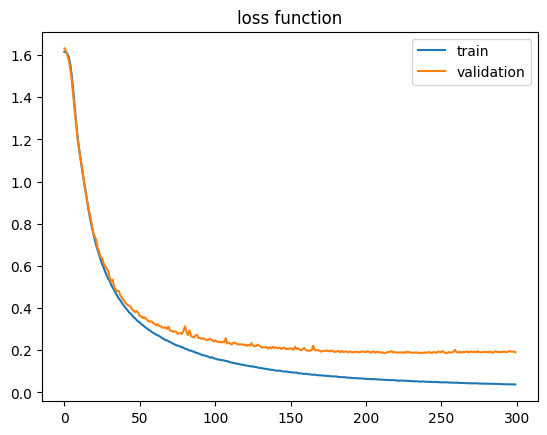

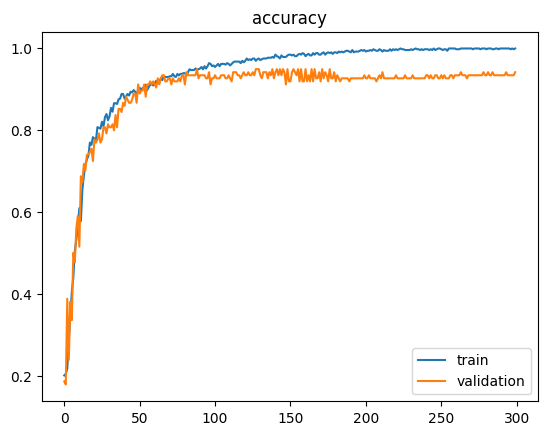

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  2 130   1   0   0]
 [  0   1 132   0   1]
 [  2   0   0 131   0]
 [  1   0   0   0 132]]
accuracy = 0.986486
Train loss: 0.06788528710603714
Train accuracy: 0.9864864945411682
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[62  4  1  0  0]
 [ 1 60  4  2  0]
 [ 0  0 65  0  1]
 [ 2  0  0 65  0]
 [ 0  0  1  0 66]]
accuracy = 0.952096
Test loss: 0.16674089431762695
Test accuracy: 0.9520958065986633


In [ ]:
model1, history1 = do_train(train_X1, train_Y1, test_X1, test_Y1, [8], epochs=300, learning_rate=0.1)
do_show(model1, history1, train_X1, train_Y1, test_X1, test_Y1)
# The number of epochs was gradually increasing until we see on the graph that the model converges.

## Model 2

hidden layer sizes [12]
5 classes, 125 features
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 125)]             0         
                                                                 
 dense_2 (Dense)             (None, 12)                1512      
                                                                 
 dense_3 (Dense)             (None, 5)                 65        
                                                                 
Total params: 1577 (6.16 KB)
Trainable params: 1577 (6.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9962406158447266 0.9328358173370361


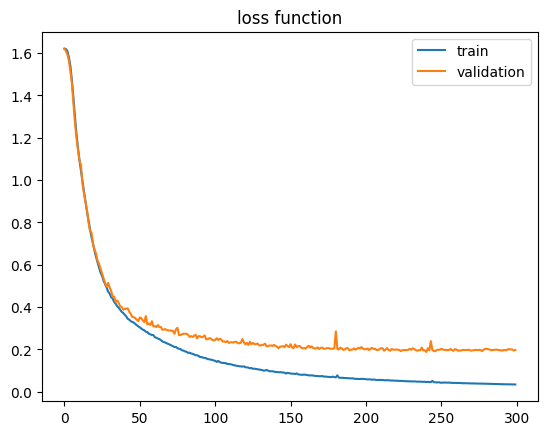

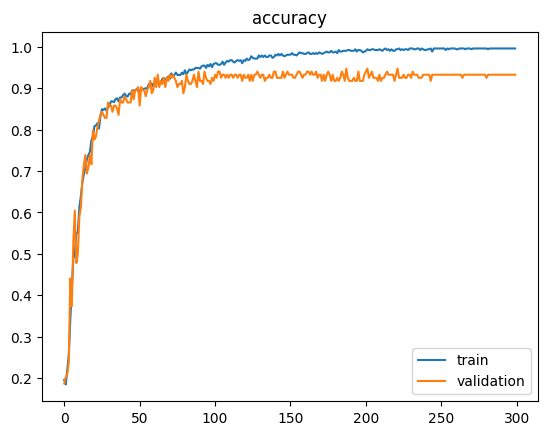

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  2 128   3   0   0]
 [  0   2 132   0   0]
 [  2   0   0 131   0]
 [  1   0   0   0 132]]
accuracy = 0.983483
Train loss: 0.0666748657822609
Train accuracy: 0.9834834933280945
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 3ms/step
Confusion matrix for test:
[[62  4  1  0  0]
 [ 3 56  5  3  0]
 [ 0  0 65  0  1]
 [ 0  0  0 67  0]
 [ 0  0  2  0 65]]
accuracy = 0.943114
Test loss: 0.17657233774662018
Test accuracy: 0.9431137442588806


In [ ]:
model2, history2 = do_train(train_X1, train_Y1, test_X1, test_Y1, [12], epochs=300, learning_rate=0.1)
do_show(model2, history2, train_X1, train_Y1, test_X1, test_Y1)

## Model 3

hidden layer sizes [32]
5 classes, 125 features
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 125)]             0         
                                                                 
 dense_4 (Dense)             (None, 32)                4032      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9962406158447266 0.9328358173370361


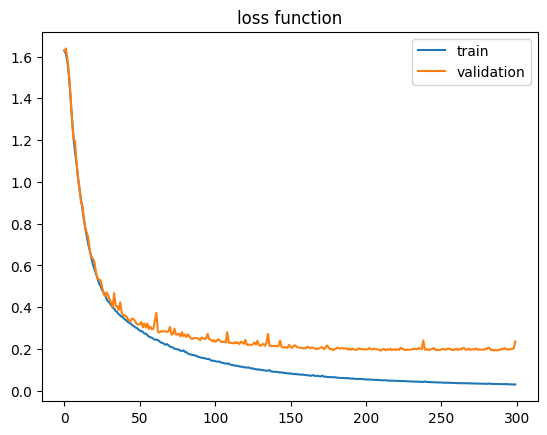

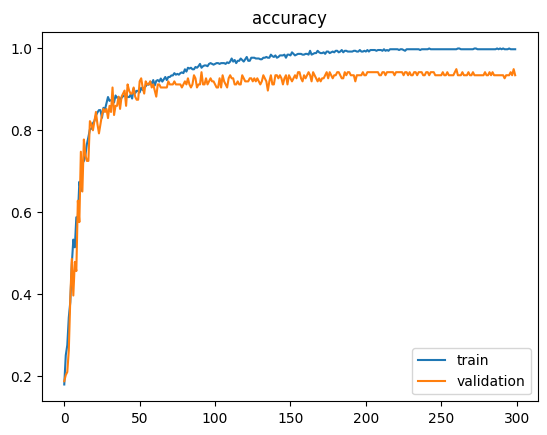

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  2 131   0   0   0]
 [  0   4 130   0   0]
 [  2   0   0 131   0]
 [  0   1   0   0 132]]
accuracy = 0.984985
Train loss: 0.07956326752901077
Train accuracy: 0.9849849939346313
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[63  4  0  0  0]
 [ 1 61  3  2  0]
 [ 0  3 62  0  1]
 [ 0  1  0 66  0]
 [ 0  1  1  0 65]]
accuracy = 0.949102
Test loss: 0.18837949633598328
Test accuracy: 0.9491018056869507


In [ ]:
model3, history3 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, learning_rate=0.1)
do_show(model3, history3, train_X1, train_Y1, test_X1, test_Y1)


Model 1 with 8 neurons in single hidden layer showed the best test accuracy of **~94.6%**. Model 3 is also very close. We tested them both in the next task and decided to go with Model 3.

# Task 2 - activation

Choose activation for hidden layer

## Model 4 - relu

hidden layer sizes [32]
5 classes, 125 features
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 125)]             0         
                                                                 
 dense_6 (Dense)             (None, 32)                4032      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9981203079223633 0.9626865386962891


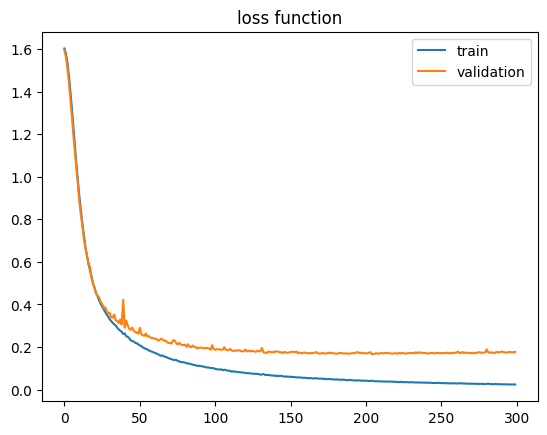

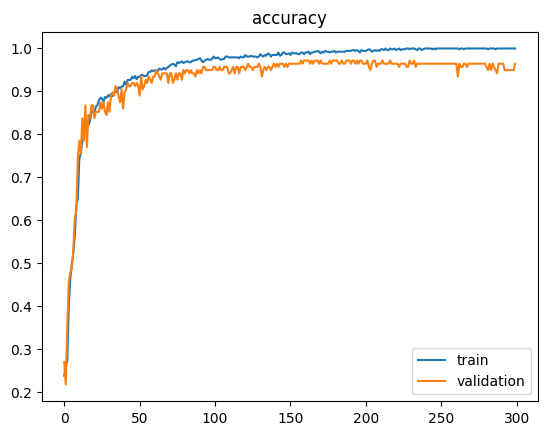

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  0 133   0   0   0]
 [  0   2 132   0   0]
 [  2   0   0 131   0]
 [  0   1   0   0 132]]
accuracy = 0.990991
Train loss: 0.053394805639982224
Train accuracy: 0.9909909963607788
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[64  2  1  0  0]
 [ 2 60  2  2  1]
 [ 0  1 64  0  1]
 [ 0  1  0 66  0]
 [ 0  0  1  0 66]]
accuracy = 0.958084
Test loss: 0.16300807893276215
Test accuracy: 0.9580838084220886


In [ ]:
model4, history4 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, learning_rate=0.025, hidden_layer_activation_function='relu')
do_show(model4, history4, train_X1, train_Y1, test_X1, test_Y1)


##Model 5 - tanh

hidden layer sizes [32]
5 classes, 125 features
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 125)]             0         
                                                                 
 dense_8 (Dense)             (None, 32)                4032      
                                                                 
 dense_9 (Dense)             (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9962406158447266 0.9402984976768494


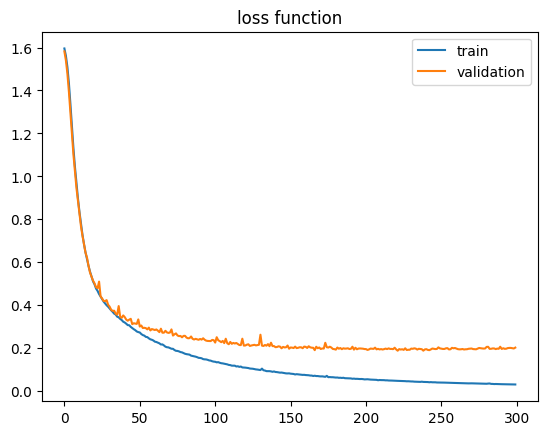

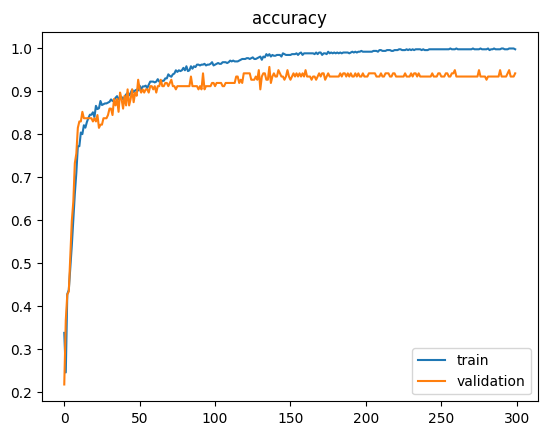

21/21 [==============================] - 0s 1ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  2 130   1   0   0]
 [  0   2 132   0   0]
 [  2   0   0 131   0]
 [  1   0   0   0 132]]
accuracy = 0.986486
Train loss: 0.06437787413597107
Train accuracy: 0.9864864945411682
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[63  3  1  0  0]
 [ 3 58  4  2  0]
 [ 0  0 65  0  1]
 [ 0  0  0 67  0]
 [ 0  0  1  0 66]]
accuracy = 0.955090
Test loss: 0.18727636337280273
Test accuracy: 0.955089807510376


In [ ]:
model5, history5 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, learning_rate=0.025, hidden_layer_activation_function='tanh')
do_show(model5, history5, train_X1, train_Y1, test_X1, test_Y1)



##Model 6 - leaky relu

hidden layer sizes [32]
5 classes, 125 features
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 125)]             0         
                                                                 
 dense_10 (Dense)            (None, 32)                4032      
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9981203079223633 0.9328358173370361


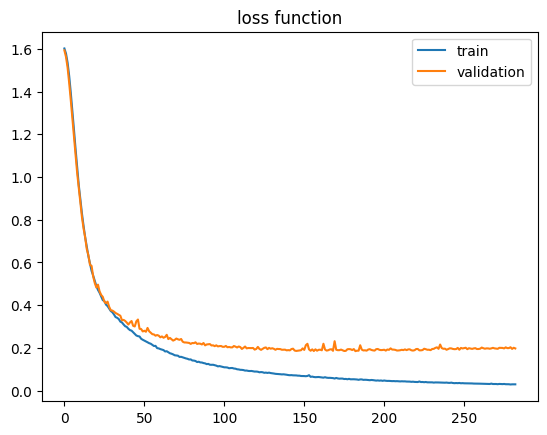

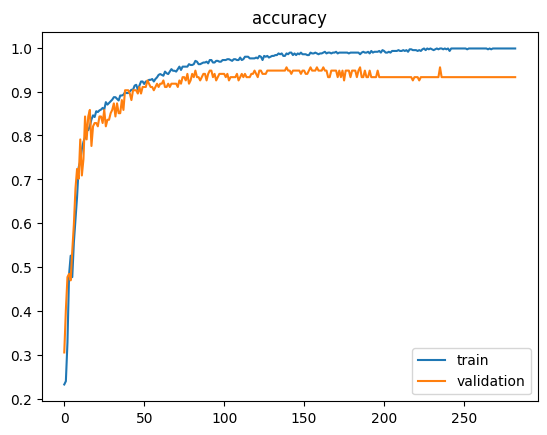

21/21 [==============================] - 0s 1ms/step
Confusion matrix for train:
[[131   1   0   1   0]
 [  2 129   2   0   0]
 [  0   3 131   0   0]
 [  2   0   0 131   0]
 [  0   1   0   0 132]]
accuracy = 0.981982
Train loss: 0.07690178602933884
Train accuracy: 0.9819819927215576
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[62  3  2  0  0]
 [ 5 56  3  3  0]
 [ 0  1 63  0  2]
 [ 0  1  0 66  0]
 [ 0  0  1  0 66]]
accuracy = 0.937126
Test loss: 0.1919451206922531
Test accuracy: 0.9371257424354553


In [ ]:
model6, history6 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, learning_rate=0.025, hidden_layer_activation_function='leaky_relu')
do_show(model6, history6, train_X1, train_Y1, test_X1, test_Y1)



All the models in this task with activations of 'relu', 'tanh' and 'leaky_relu' showed some small improvement in test accuracy. 'relu' and 'tanh' have the best performance at ~95.2%. We continue with 'relu' activation for the hidden layer.

# Task 3 - dynamic learning rate

Model 7, 8, 9

Changing learning rate to dynamic

The 3 models represent 3 different learning rate schedule: linear (m7), step (m9), and exponential (m8).

Linear schedule is basically polynomial of 1.

Step is step decrease every or so epoch by certain factor.

Exponential schedule decay learning rate after certain number of epochs exponentially .

hidden layer sizes [32]
5 classes, 125 features
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 125)]             0         
                                                                 
 dense_12 (Dense)            (None, 32)                4032      
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9661654233932495 0.9328358173370361


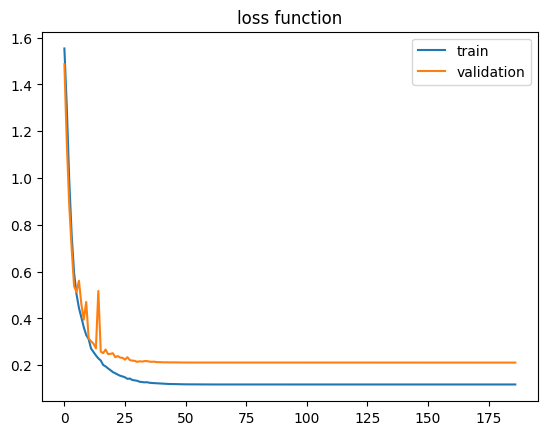

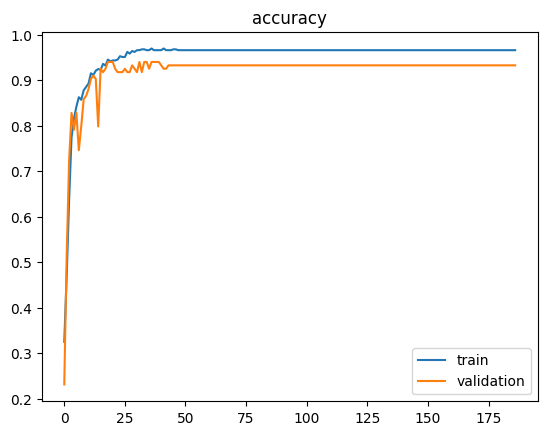

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[128   4   0   1   0]
 [  6 124   2   1   0]
 [  0   5 125   1   3]
 [  3   0   0 130   0]
 [  0   1   0   0 132]]
accuracy = 0.959459
Train loss: 0.13658471405506134
Train accuracy: 0.9594594836235046
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[63  3  1  0  0]
 [ 5 57  2  3  0]
 [ 0  1 63  0  2]
 [ 2  1  0 64  0]
 [ 0  0  1  0 66]]
accuracy = 0.937126
Test loss: 0.204126238822937
Test accuracy: 0.9371257424354553


In [ ]:
linear_schedule = make_poly_scheduler(300, 1)

model7, history7 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32],
                            epochs=300,
                            learning_rate=0.1,
                            hidden_layer_activation_function='relu',
                            schedule_callback=linear_schedule)
do_show(model7, history7, train_X1, train_Y1, test_X1, test_Y1)


hidden layer sizes [32]
5 classes, 125 features
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 125)]             0         
                                                                 
 dense_14 (Dense)            (None, 32)                4032      
                                                                 
 dense_15 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1.0 0.9477611780166626


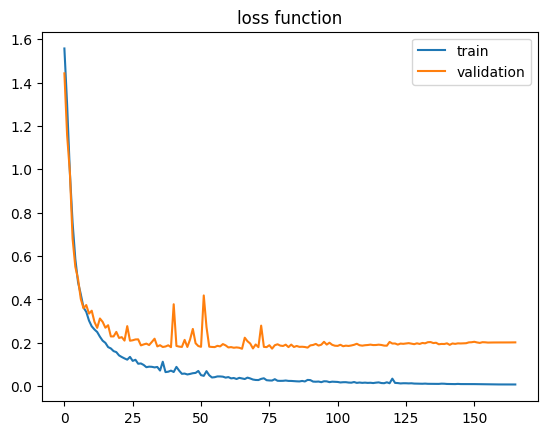

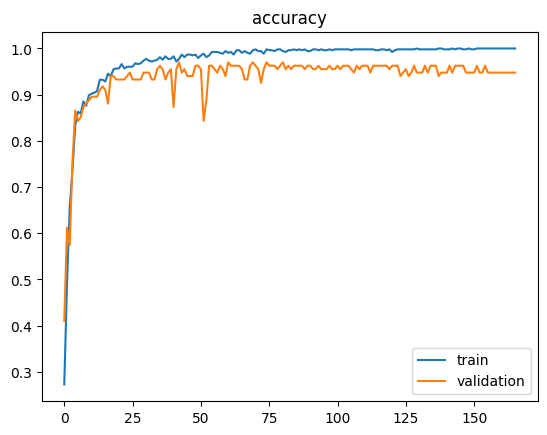

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  0 132   0   0   1]
 [  0   2 132   0   0]
 [  2   0   0 131   0]
 [  0   1   0   0 132]]
accuracy = 0.989489
Train loss: 0.05679450184106827
Train accuracy: 0.9894894957542419
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[64  2  1  0  0]
 [ 2 60  2  2  1]
 [ 0  1 63  0  2]
 [ 1  1  0 65  0]
 [ 0  0  1  0 66]]
accuracy = 0.952096
Test loss: 0.15986579656600952
Test accuracy: 0.9520958065986633


In [ ]:
expo_decay_schedule = make_expo_scheduler(150)

model8, history8 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, learning_rate=0.1, hidden_layer_activation_function='relu',
                            schedule_callback=expo_decay_schedule)
do_show(model8, history8, train_X1, train_Y1, test_X1, test_Y1)


hidden layer sizes [32]
5 classes, 125 features
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 125)]             0         
                                                                 
 dense_16 (Dense)            (None, 32)                4032      
                                                                 
 dense_17 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9755638837814331 0.9402984976768494


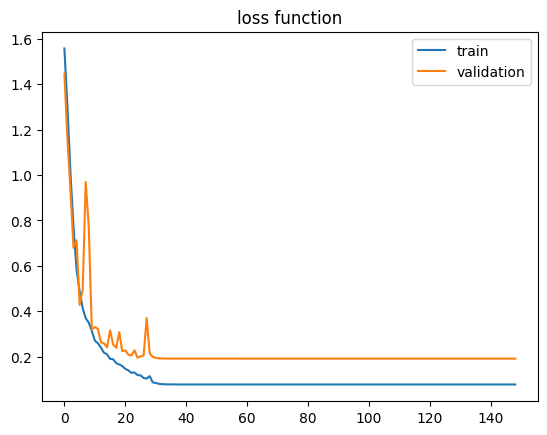

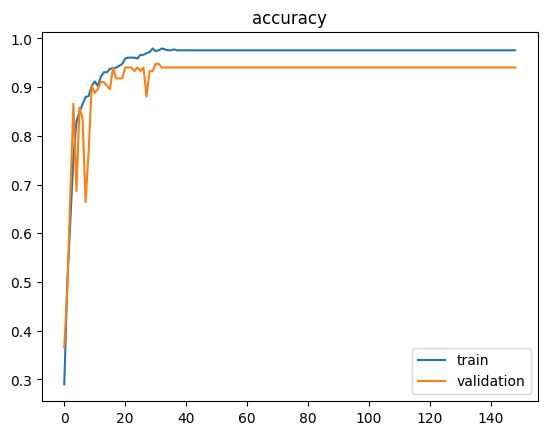

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[131   1   0   1   0]
 [  6 125   2   0   0]
 [  0   4 127   1   2]
 [  3   0   0 130   0]
 [  0   1   0   0 132]]
accuracy = 0.968468
Train loss: 0.10070065408945084
Train accuracy: 0.9684684872627258
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[64  2  1  0  0]
 [ 4 59  2  2  0]
 [ 0  1 62  0  3]
 [ 1  1  0 65  0]
 [ 0  0  1  0 66]]
accuracy = 0.946108
Test loss: 0.1820739060640335
Test accuracy: 0.946107804775238


In [ ]:
step_decay_schedule = make_step_scheduler(0.5, 30)

model9, history9 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32],
                            epochs=300,
                            learning_rate=0.1,
                            hidden_layer_activation_function='relu',
                            schedule_callback=step_decay_schedule)
do_show(model9, history9, train_X1, train_Y1, test_X1, test_Y1)


With our static learning rate of 0.025 we were able to get ~95% of test accuracy.

We are not able to break new grounds with our dynamic learning rate.


**So at this moment dynamic leaning rate does not improve the accuracy of our model.**

#Task 4 - optimizer

Change and tune the optimizer with SGD momentum, RMSProp, Adam, and Adagrad.

## Model 10 - SGD with momentum

hidden layer sizes [32]
5 classes, 125 features
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_18 (Dense)            (None, 32)                4032      
                                                                 
 dense_19 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9680451154708862 0.9328358173370361


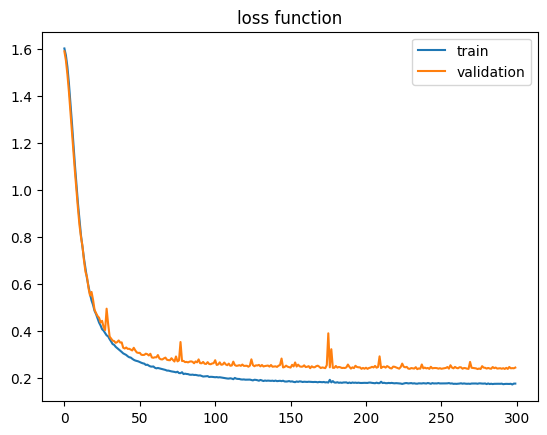

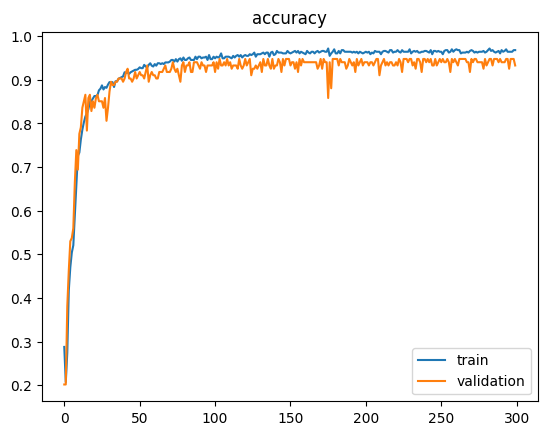

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[129   2   1   1   0]
 [  6 124   2   1   0]
 [  0   7 126   1   0]
 [  3   0   0 130   0]
 [  0   3   1   0 129]]
accuracy = 0.957958
Train loss: 0.18753066658973694
Train accuracy: 0.9579579830169678
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[62  4  1  0  0]
 [ 3 59  0  5  0]
 [ 0  5 59  1  1]
 [ 2  1  0 64  0]
 [ 0  0  1  0 66]]
accuracy = 0.928144
Test loss: 0.24157732725143433
Test accuracy: 0.9281437397003174


In [ ]:
# trying a couple of parameters with sgd before moving on to other optimizers
sgd_dynamic_lr = keras.optimizers.SGD(learning_rate=0.025,
                                      momentum=0.1,
                                      nesterov=True,
                                      weight_decay=0.01)

model10, history10 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300,
                              hidden_layer_activation_function='relu',
                              opt=sgd_dynamic_lr)
do_show(model10, history10, train_X1, train_Y1, test_X1, test_Y1)

## Model 11 - RMSprop

hidden layer sizes [32]
5 classes, 125 features
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_57 (Dense)            (None, 32)                4032      
                                                                 
 dense_58 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1.0 0.9179104566574097


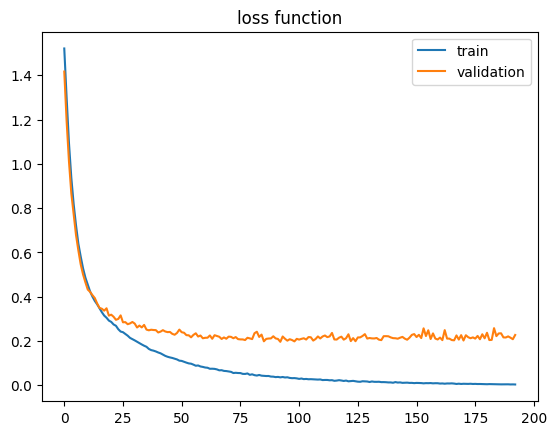

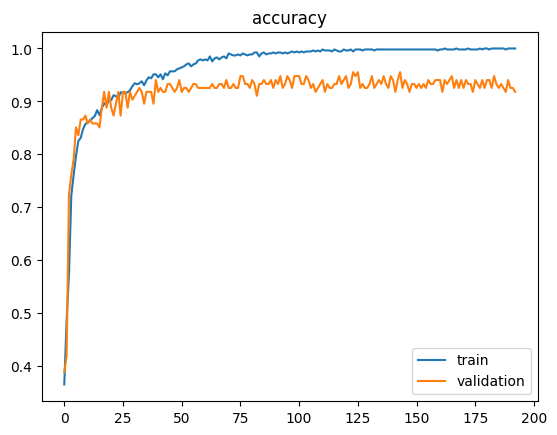

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  1 128   4   0   0]
 [  0   1 133   0   0]
 [  2   0   0 131   0]
 [  0   1   0   0 132]]
accuracy = 0.984985
Train loss: 0.06418326497077942
Train accuracy: 0.9849849939346313
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[65  2  0  0  0]
 [ 5 57  3  2  0]
 [ 0  2 63  0  1]
 [ 0  1  0 66  0]
 [ 0  0  1  0 66]]
accuracy = 0.949102
Test loss: 0.17903120815753937
Test accuracy: 0.9491018056869507


In [ ]:
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model11, history11 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32],
                              epochs=300,
                              hidden_layer_activation_function='relu',
                              opt=rmsprop_opt)
do_show(model11, history11, train_X1, train_Y1, test_X1, test_Y1)

## Model 12 - Adam

hidden layer sizes [32]
5 classes, 125 features
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_22 (Dense)            (None, 32)                4032      
                                                                 
 dense_23 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1.0 0.9477611780166626


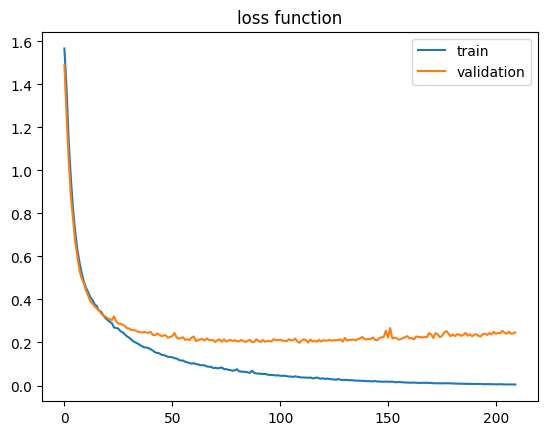

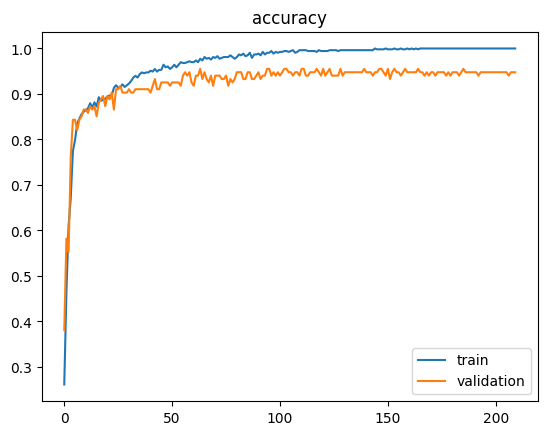

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  1 130   1   0   1]
 [  0   2 131   0   1]
 [  2   0   0 131   0]
 [  1   0   0   0 132]]
accuracy = 0.984985
Train loss: 0.06910324841737747
Train accuracy: 0.9849849939346313
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[61  5  1  0  0]
 [ 3 56  3  3  2]
 [ 0  1 63  0  2]
 [ 0  0  0 66  1]
 [ 0  0  1  0 66]]
accuracy = 0.934132
Test loss: 0.23212656378746033
Test accuracy: 0.9341317415237427


In [ ]:
adam_opt = keras.optimizers.Adam(learning_rate=0.001,)
model12, history12 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300,
                              hidden_layer_activation_function='relu',
                              opt=adam_opt)
do_show(model12, history12, train_X1, train_Y1, test_X1, test_Y1)


## Model 13 - Adagrad

hidden layer sizes [32]
5 classes, 125 features
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_24 (Dense)            (None, 32)                4032      
                                                                 
 dense_25 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9661654233932495 0.9552238583564758


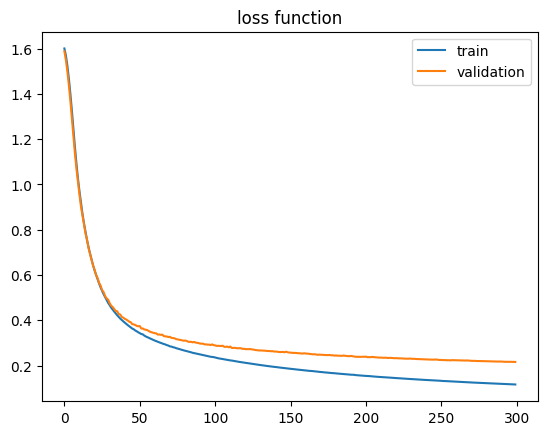

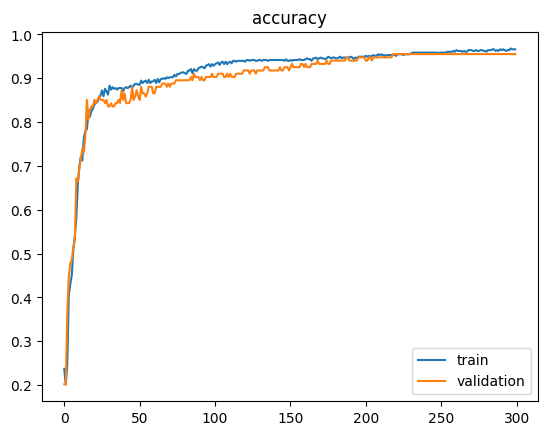

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[130   2   0   1   0]
 [  5 124   3   1   0]
 [  0   5 127   0   2]
 [  3   0   0 130   0]
 [  0   1   0   0 132]]
accuracy = 0.965465
Train loss: 0.1357685923576355
Train accuracy: 0.9654654860496521
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[62  4  1  0  0]
 [ 5 56  2  3  1]
 [ 0  1 62  0  3]
 [ 2  1  0 64  0]
 [ 0  0  1  0 66]]
accuracy = 0.928144
Test loss: 0.21464936435222626
Test accuracy: 0.9281437397003174


In [ ]:
adagrad_opt = keras.optimizers.Adagrad(learning_rate=0.01)
model13, history13 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, hidden_layer_activation_function='relu',
                              opt=adagrad_opt)
do_show(model13, history13, train_X1, train_Y1, test_X1, test_Y1)


RMSProp showed the best test accuracy of 95.2% among other optimizers, with epochs = 300 and static learning rate = 0.001, rho=0.9 and momentum=0.1

# Task 5 - loss

## Model 14 - sparse_categorical_crossentropy

hidden layer sizes [32]
5 classes, 125 features
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_26 (Dense)            (None, 32)                4032      
                                                                 
 dense_27 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1.0 0.9626865386962891


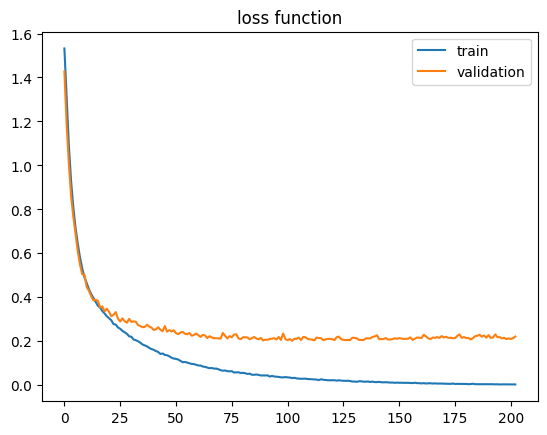

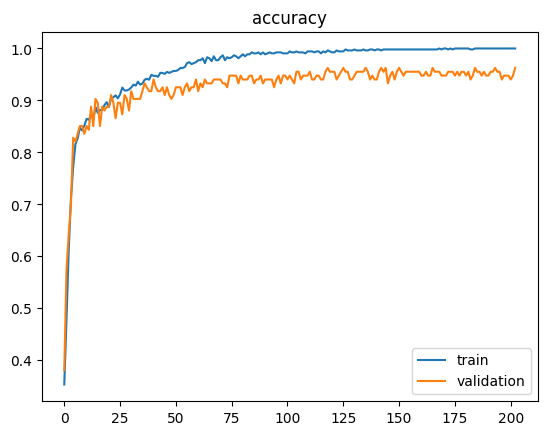

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  1 128   3   0   1]
 [  0   2 131   0   1]
 [  2   0   0 131   0]
 [  1   0   0   0 132]]
accuracy = 0.981982
Train loss: 0.06384360045194626
Train accuracy: 0.9819819927215576
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[65  2  0  0  0]
 [ 5 55  2  3  2]
 [ 0  1 63  0  2]
 [ 0  0  0 66  1]
 [ 0  0  1  0 66]]
accuracy = 0.943114
Test loss: 0.21133294701576233
Test accuracy: 0.9431137442588806


In [ ]:
# adam_opt = keras.optimizers.Adam(learning_rate=0.001,)
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)

model14, history14 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300,
                              hidden_layer_activation_function='relu', opt=rmsprop_opt,
                              output_layer_activation_function='softmax',
                              loss='sparse_categorical_crossentropy')
# sparse categorical cross entrophy use integer instead of one hot encoding as predictions
do_show(model14, history14, train_X1, train_Y1, test_X1, test_Y1, y_to_categorical=False)


# Task 6 - second hidden layer

## Model 15 [32, 16]

hidden layer sizes [32, 16]
5 classes, 125 features
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_28 (Dense)            (None, 32)                4032      
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 5)                 85        
                                                                 
Total params: 4645 (18.14 KB)
Trainable params: 4645 (18.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9962406158447266 0.9328358173370361


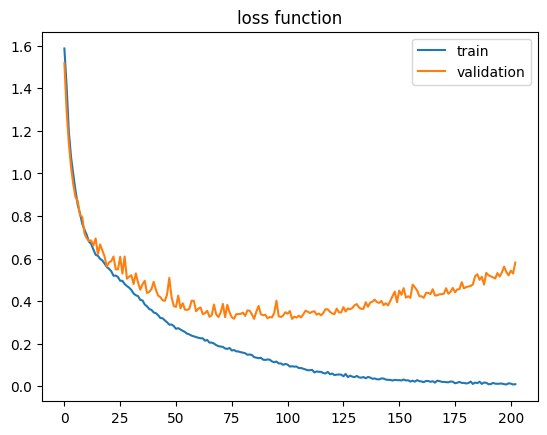

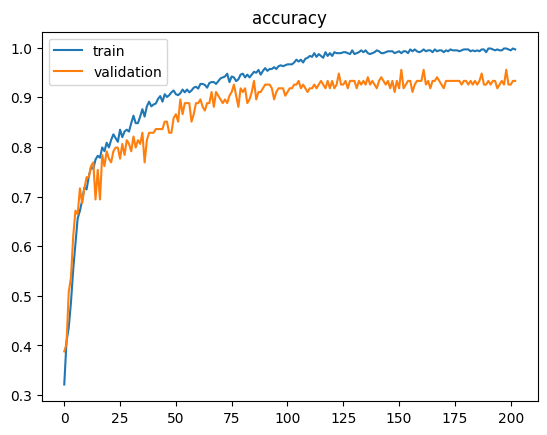

21/21 [==============================] - 0s 1ms/step
Confusion matrix for train:
[[130   3   0   0   0]
 [  1 123   5   4   0]
 [  0   1 130   0   3]
 [  3   0   0 130   0]
 [  1   0   4   0 128]]
accuracy = 0.962462
Train loss: 0.12471142411231995
Train accuracy: 0.9624624848365784
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[63  3  1  0  0]
 [ 2 56  6  3  0]
 [ 1  0 63  0  2]
 [ 1  1  0 65  0]
 [ 0  0  3  0 64]]
accuracy = 0.931138
Test loss: 0.23455260694026947
Test accuracy: 0.93113774061203


In [ ]:
# adam_opt = keras.optimizers.Adam(learning_rate=0.001,)
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model15, history15 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32, 16], epochs=300,
                              hidden_layer_activation_function='relu',
                              opt=rmsprop_opt)

do_show(model15, history15, train_X1, train_Y1, test_X1, test_Y1)


## Model 16 [32, 24]

hidden layer sizes [32, 24]
5 classes, 125 features
Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_31 (Dense)            (None, 32)                4032      
                                                                 
 dense_32 (Dense)            (None, 24)                792       
                                                                 
 dense_33 (Dense)            (None, 5)                 125       
                                                                 
Total params: 4949 (19.33 KB)
Trainable params: 4949 (19.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9981203079223633 0.9253731369972229


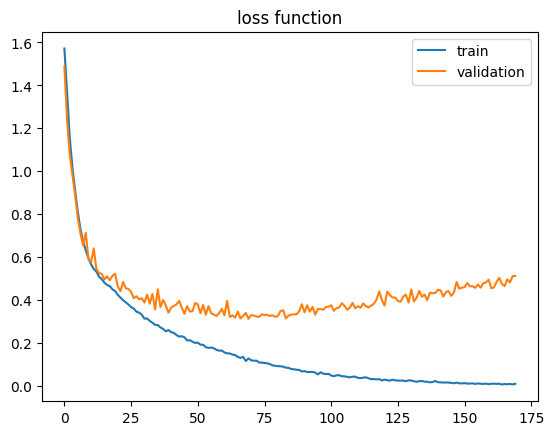

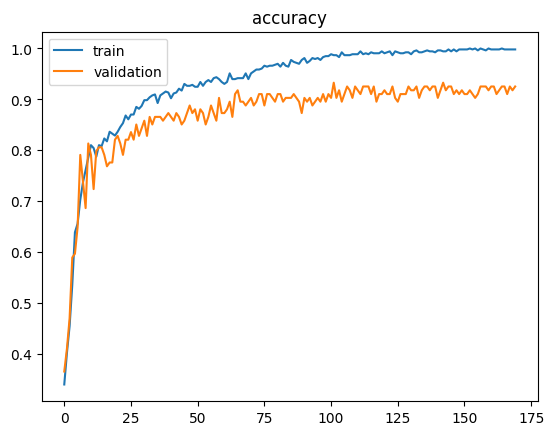

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[121   9   3   0   0]
 [  5 121   7   0   0]
 [  1   2 127   0   4]
 [  3   0   0 130   0]
 [  0   1   3   0 129]]
accuracy = 0.942943
Train loss: 0.1530609279870987
Train accuracy: 0.9429429173469543
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[59  6  2  0  0]
 [ 3 57  1  3  3]
 [ 1  0 61  0  4]
 [ 2  1  0 64  0]
 [ 0  0  2  0 65]]
accuracy = 0.916168
Test loss: 0.26911717653274536
Test accuracy: 0.916167676448822


In [ ]:
# adam_opt = keras.optimizers.Adam(learning_rate=0.001,)
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model16, history16 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32, 24],
                              epochs=300, hidden_layer_activation_function='relu',
                              opt=rmsprop_opt,
                              output_layer_activation_function='softmax')
do_show(model16, history16, train_X1, train_Y1, test_X1, test_Y1)

## Model 17 [32, 32]

hidden layer sizes [32, 32]
5 classes, 125 features
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_34 (Dense)            (None, 32)                4032      
                                                                 
 dense_35 (Dense)            (None, 32)                1056      
                                                                 
 dense_36 (Dense)            (None, 5)                 165       
                                                                 
Total params: 5253 (20.52 KB)
Trainable params: 5253 (20.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9981203079223633 0.9179104566574097


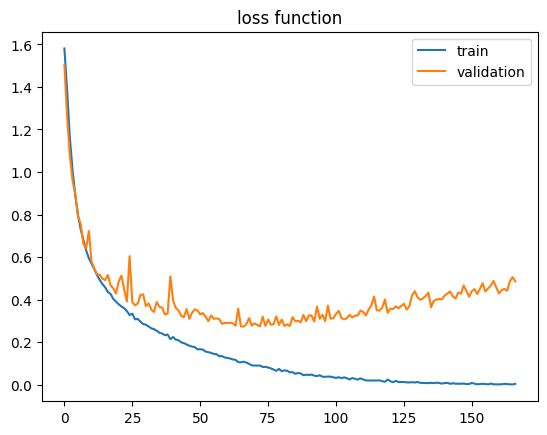

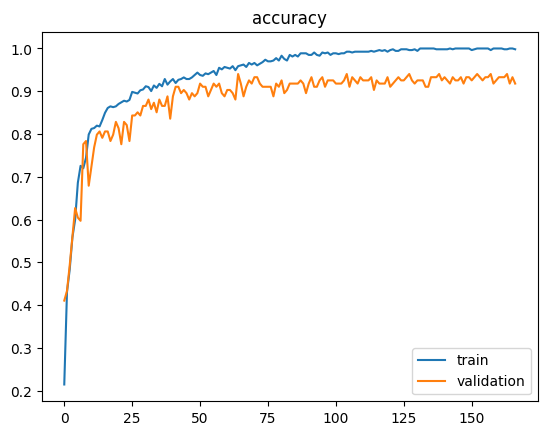

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[124   9   0   0   0]
 [  8 120   5   0   0]
 [  0   4 129   0   1]
 [  2   0   0 131   0]
 [  0   1   4   0 128]]
accuracy = 0.948949
Train loss: 0.13134633004665375
Train accuracy: 0.9489489197731018
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[61  5  1  0  0]
 [ 4 57  3  2  1]
 [ 0  1 64  0  1]
 [ 0  1  0 66  0]
 [ 0  2  1  0 64]]
accuracy = 0.934132
Test loss: 0.25728508830070496
Test accuracy: 0.9341317415237427


In [ ]:
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model17, history17 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32, 32],
                              epochs=300, hidden_layer_activation_function='relu',
                              opt=rmsprop_opt, output_layer_activation_function='softmax')
do_show(model17, history17, train_X1, train_Y1, test_X1, test_Y1)

Model 11  - with one hidden layer, has the best test accuracy we continue with that.

As we can see here, adding more lyaers lead to faster convergence (local minima) and overfitting seen in loss graphs. For this task, we do not recommend more than 1 layer.

# Task 7 - batch size

## Model 18 - batch size=8

hidden layer sizes [32]
5 classes, 125 features
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_37 (Dense)            (None, 32)                4032      
                                                                 
 dense_38 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9981203079223633 0.9253731369972229


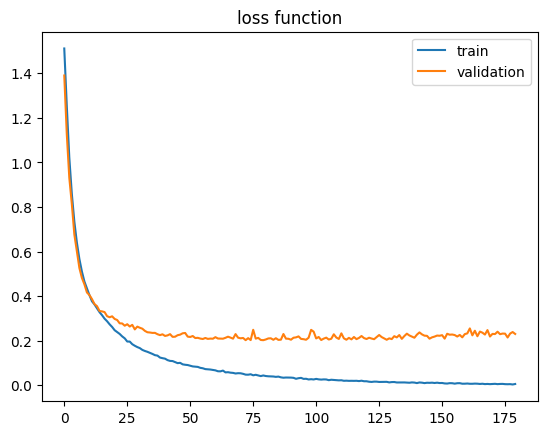

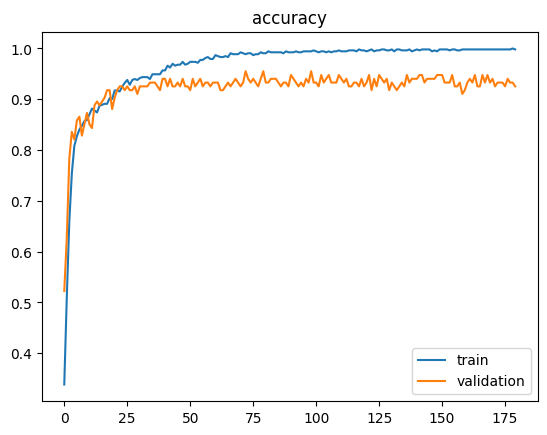

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[133   0   0   0   0]
 [  0 129   4   0   0]
 [  0   1 133   0   0]
 [  3   0   0 130   0]
 [  1   0   0   0 132]]
accuracy = 0.986486
Train loss: 0.07078748196363449
Train accuracy: 0.9864864945411682
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[64  2  1  0  0]
 [ 3 58  2  3  1]
 [ 0  1 64  0  1]
 [ 2  0  0 64  1]
 [ 0  0  1  0 66]]
accuracy = 0.946108
Test loss: 0.15878254175186157
Test accuracy: 0.946107804775238


In [ ]:
# adam_opt = keras.optimizers.Adam(learning_rate=0.001)
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model18, history18 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, batch_size=8, hidden_layer_activation_function='relu', opt=rmsprop_opt, output_layer_activation_function='softmax')
do_show(model18, history18, train_X1, train_Y1, test_X1, test_Y1)


## Model 19 - batch size=16

hidden layer sizes [32]
5 classes, 125 features
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_39 (Dense)            (None, 32)                4032      
                                                                 
 dense_40 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9981203079223633 0.9179104566574097


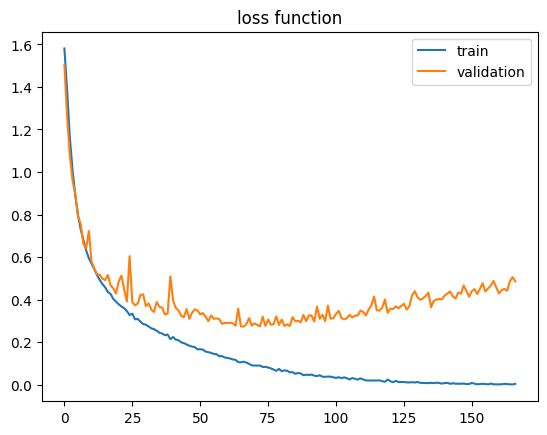

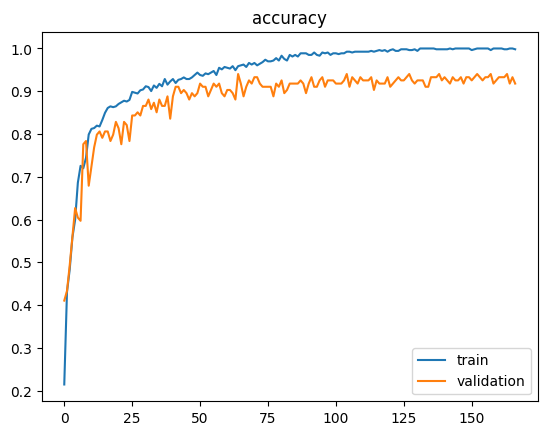

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[124   9   0   0   0]
 [  8 120   5   0   0]
 [  0   4 129   0   1]
 [  2   0   0 131   0]
 [  0   1   4   0 128]]
accuracy = 0.948949
Train loss: 0.13134633004665375
Train accuracy: 0.9489489197731018
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[61  5  1  0  0]
 [ 4 57  3  2  1]
 [ 0  1 64  0  1]
 [ 0  1  0 66  0]
 [ 0  2  1  0 64]]
accuracy = 0.934132
Test loss: 0.25728508830070496
Test accuracy: 0.9341317415237427


In [ ]:
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)

model19, history19 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, batch_size=16, hidden_layer_activation_function='relu', opt=rmsprop_opt, output_layer_activation_function='softmax')
do_show(model17, history17, train_X1, train_Y1, test_X1, test_Y1)


## Model 20 - batch size=32

hidden layer sizes [32]
5 classes, 125 features
Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_41 (Dense)            (None, 32)                4032      
                                                                 
 dense_42 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1.0 0.9477611780166626


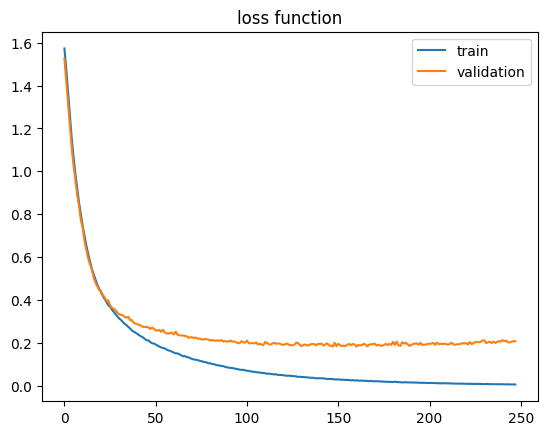

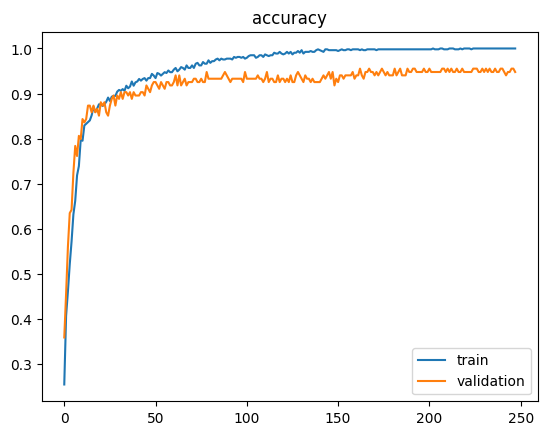

21/21 [==============================] - 0s 1ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  0 130   3   0   0]
 [  0   1 133   0   0]
 [  2   0   0 131   0]
 [  1   0   0   0 132]]
accuracy = 0.987988
Train loss: 0.05872229114174843
Train accuracy: 0.9879879951477051
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[65  2  0  0  0]
 [ 4 57  3  2  1]
 [ 0  1 63  0  2]
 [ 0  0  0 66  1]
 [ 0  0  1  0 66]]
accuracy = 0.949102
Test loss: 0.17510752379894257
Test accuracy: 0.9491018056869507


In [ ]:
# adam_opt = keras.optimizers.Adam(learning_rate=0.001)
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model18, history18 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, batch_size=32, hidden_layer_activation_function='relu', opt=rmsprop_opt, output_layer_activation_function='softmax')
do_show(model18, history18, train_X1, train_Y1, test_X1, test_Y1)


## Model 21 - batch size=64

hidden layer sizes [32]
5 classes, 125 features
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_43 (Dense)            (None, 32)                4032      
                                                                 
 dense_44 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.9981203079223633 0.9328358173370361


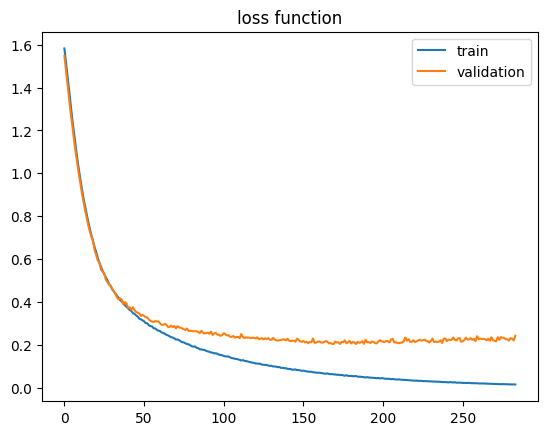

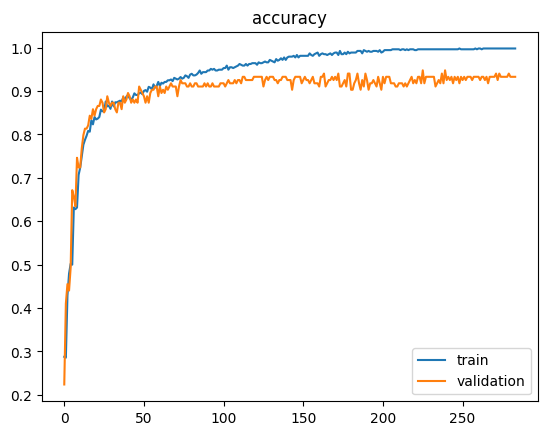

21/21 [==============================] - 0s 1ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  4 125   4   0   0]
 [  0   2 132   0   0]
 [  2   0   0 131   0]
 [  1   0   0   0 132]]
accuracy = 0.978979
Train loss: 0.08267974108457565
Train accuracy: 0.9789789915084839
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[62  3  2  0  0]
 [ 6 55  2  2  2]
 [ 0  1 63  0  2]
 [ 0  0  0 66  1]
 [ 0  0  1  0 66]]
accuracy = 0.934132
Test loss: 0.21266093850135803
Test accuracy: 0.9341317415237427


In [ ]:
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model21, history21 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, batch_size=64, hidden_layer_activation_function='relu', opt=rmsprop_opt, output_layer_activation_function='softmax')
do_show(model21, history21, train_X1, train_Y1, test_X1, test_Y1)


# Model 22 - HeNormal Weight Initializer

hidden layer sizes [32]
5 classes, 125 features
Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_59 (Dense)            (None, 32)                4032      
                                                                 
 dense_60 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1.0 0.9402984976768494


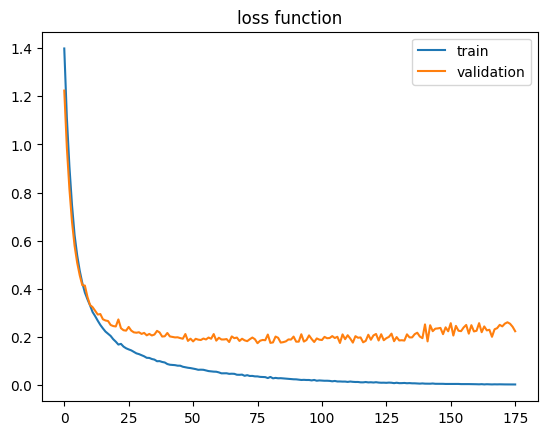

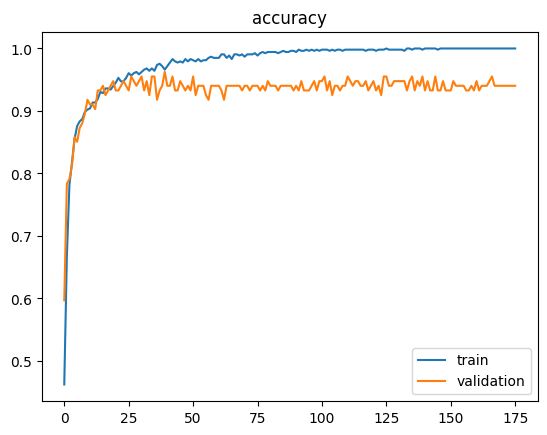

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[133   0   0   0   0]
 [  2 128   3   0   0]
 [  0   2 132   0   0]
 [  2   0   0 131   0]
 [  0   1   0   0 132]]
accuracy = 0.984985
Train loss: 0.059221915900707245
Train accuracy: 0.9849849939346313
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[64  2  1  0  0]
 [ 2 61  2  2  0]
 [ 1  2 62  0  1]
 [ 0  1  0 66  0]
 [ 0  0  1  0 66]]
accuracy = 0.955090
Test loss: 0.15275153517723083
Test accuracy: 0.955089807510376


In [ ]:
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model22, history22 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, batch_size=10,
                              hidden_layer_activation_function='relu', opt=rmsprop_opt, output_layer_activation_function='softmax',
                              initializer=keras.initializers.HeNormal(100))
do_show(model22, history22, train_X1, train_Y1, test_X1, test_Y1)


Increasing the batch size makes the training process faster, but decreases the performance.

We continue we batch size = 10, it shows good balance of the performance and speed.

In addition, we perform additional testing with HeNormal initializer and continue with that.

# Task 8

## Model 23 - train and evaluate Split 1 with best configs

hidden layer sizes [32]
5 classes, 125 features
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_47 (Dense)            (None, 32)                4032      
                                                                 
 dense_48 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1.0 0.9477611780166626


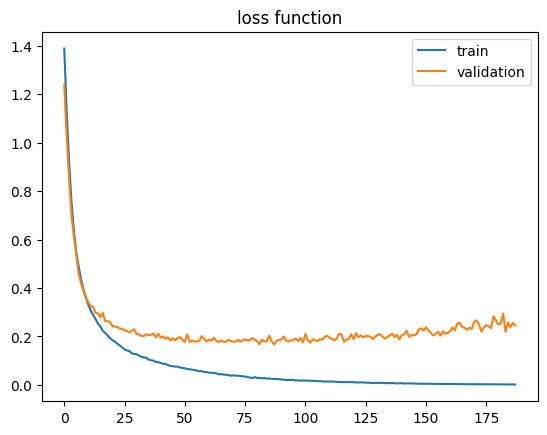

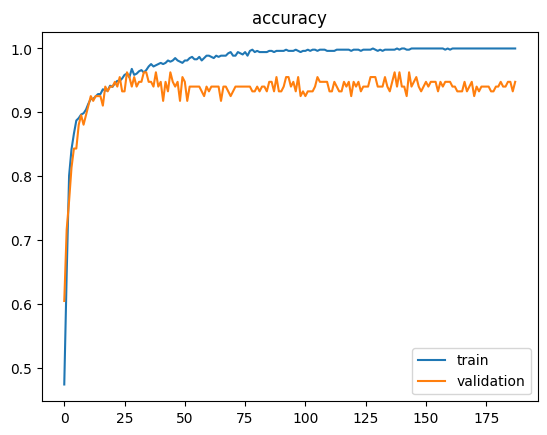

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[133   0   0   0   0]
 [  2 127   4   0   0]
 [  0   2 132   0   0]
 [  2   0   0 131   0]
 [  0   1   0   0 132]]
accuracy = 0.983483
Train loss: 0.05113620683550835
Train accuracy: 0.9834834933280945
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[64  2  1  0  0]
 [ 1 62  2  2  0]
 [ 1  1 63  0  1]
 [ 0  1  0 66  0]
 [ 0  0  1  0 66]]
accuracy = 0.961078
Test loss: 0.14876903593540192
Test accuracy: 0.961077868938446

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.93      0.93        67
           2       0.94      0.95      0.95        66
           3       0.97      0.99      0.98        67
           4       0.99      0.99      0.99        67

    accuracy                           0.96       334
   macro avg     

In [ ]:
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model23, history23 = do_train(train_X1, train_Y1, test_X1, test_Y1, [32], epochs=300, batch_size=10,
                              hidden_layer_activation_function='relu', opt=rmsprop_opt, output_layer_activation_function='softmax',
                              initializer=keras.initializers.HeNormal(100))
cr1 = do_show(model23, history23, train_X1, train_Y1, test_X1, test_Y1, extra_metrics=True)

## Model 24 - train and evaluate Split 2 with best configs

hidden layer sizes [32]
5 classes, 125 features
Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_49 (Dense)            (None, 32)                4032      
                                                                 
 dense_50 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1.0 0.9477611780166626


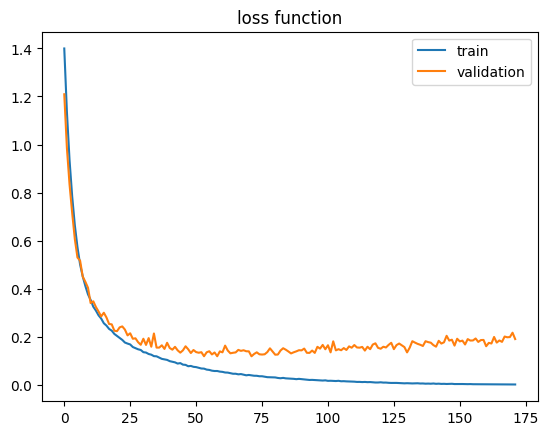

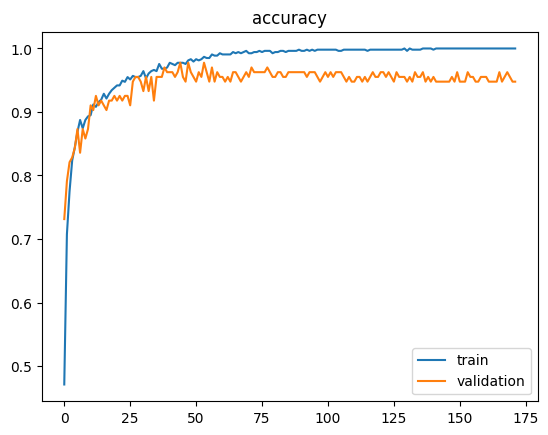

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[132   1   0   0   0]
 [  0 132   1   1   0]
 [  0   1 132   0   0]
 [  2   0   0 131   0]
 [  0   0   1   0 133]]
accuracy = 0.989505
Train loss: 0.051856014877557755
Train accuracy: 0.9895052313804626
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 2ms/step
Confusion matrix for test:
[[63  2  2  0  0]
 [ 0 64  2  0  0]
 [ 0  1 62  1  3]
 [ 0  0  0 67  0]
 [ 1  1  5  0 59]]
accuracy = 0.945946
Test loss: 0.19054707884788513
Test accuracy: 0.9459459185600281

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.94      0.97      0.96        66
           2       0.87      0.93      0.90        67
           3       0.99      1.00      0.99        67
           4       0.95      0.89      0.92        66

    accuracy                           0.95       333
   macro avg   

In [ ]:
# adam_opt = keras.optimizers.Adam(learning_rate=0.001)
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model24, history24 = do_train(train_X2, train_Y2, test_X2, test_Y2, [32], epochs=300, batch_size=10,
                              hidden_layer_activation_function='relu', opt=rmsprop_opt, output_layer_activation_function='softmax',
                              initializer=keras.initializers.HeNormal(100))
cr2 = do_show(model24, history24, train_X2, train_Y2, test_X2, test_Y2, extra_metrics=True)

## Model 25 - train and evaluate Split 3 with best configs

hidden layer sizes [32]
5 classes, 125 features
Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 125)]             0         
                                                                 
 dense_51 (Dense)            (None, 32)                4032      
                                                                 
 dense_52 (Dense)            (None, 5)                 165       
                                                                 
Total params: 4197 (16.39 KB)
Trainable params: 4197 (16.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.998123824596405 0.9701492786407471


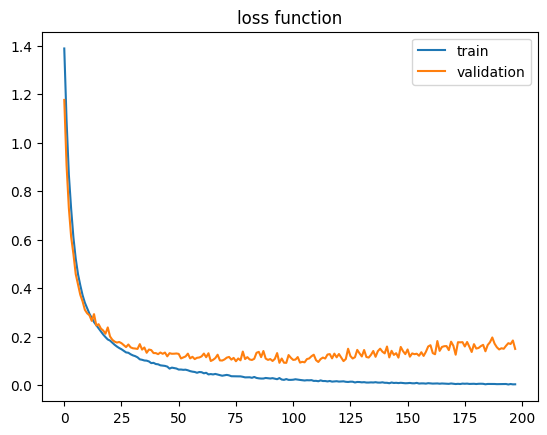

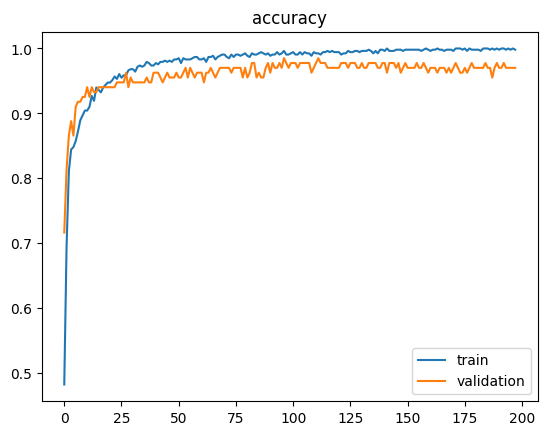

21/21 [==============================] - 0s 2ms/step
Confusion matrix for train:
[[133   1   0   0   0]
 [  0 130   2   1   0]
 [  0   1 131   1   0]
 [  0   0   0 134   0]
 [  0   1   0   0 132]]
accuracy = 0.989505
Train loss: 0.0348823256790638
Train accuracy: 0.9895052313804626
This dataset is not two-dimensional ...
11/11 [==============================] - 0s 3ms/step
Confusion matrix for test:
[[64  1  0  1  0]
 [ 1 57  6  3  0]
 [ 0  1 66  0  0]
 [ 2  0  0 64  0]
 [ 0  0  2  0 65]]
accuracy = 0.948949
Test loss: 0.20277629792690277
Test accuracy: 0.9489489197731018

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.97      0.85      0.90        67
           2       0.89      0.99      0.94        67
           3       0.94      0.97      0.96        66
           4       1.00      0.97      0.98        67

    accuracy                           0.95       333
   macro avg     

In [ ]:
rmsprop_opt = keras.optimizers.RMSprop(learning_rate=0.001,
                                       rho=0.9,
                                       momentum=0.1)
model25, history25 = do_train(train_X3, train_Y3, test_X3, test_Y3, [32], epochs=300, batch_size=10,
                              hidden_layer_activation_function='relu', opt=rmsprop_opt, output_layer_activation_function='softmax',
                              initializer=keras.initializers.HeNormal(100))
cr3 = do_show(model25, history25, train_X3, train_Y3, test_X3, test_Y3, extra_metrics=True)

## Average metrics

In [ ]:
sum_metrics = {
    'accuracy':0.0,
    'precision': 0.0,
    'recall': 0.0,
    'f1-score':0.0
    }


# Parse classification reports and calculate average

for cr in [cr1, cr2, cr3]:
  sum_metrics['accuracy'] += cr['accuracy']
  for metric_name, metric_value in cr['macro avg'].items():
    if metric_name == 'support':  # Skip support
      continue

    sum_metrics[metric_name] += metric_value

average_metrics = {key: value / 3 for key, value in sum_metrics.items()}

# print
print('Average metrics for all splits:')
for key, value in average_metrics.items():
    print(f'   {key.capitalize()}: {value:.4f}')


Average metrics for all splits:
   Accuracy: 0.9520
   Precision: 0.9530
   Recall: 0.9520
   F1-score: 0.9519


# Task 0: Dynamic Learning Rate Examples

In this section, we plot the dynamic learning rate used for task 5


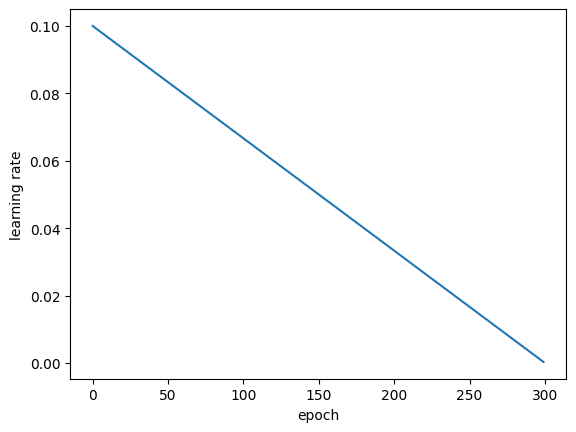

In [ ]:
# testing dynamic learning rate exponential decay
# we test with 200 epochs,
x = np.arange(300)
linear_schedule = make_poly_scheduler(300, 1)

y = [linear_schedule(i, 0.1) for i in x]
plt.plot(x, y)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.show()

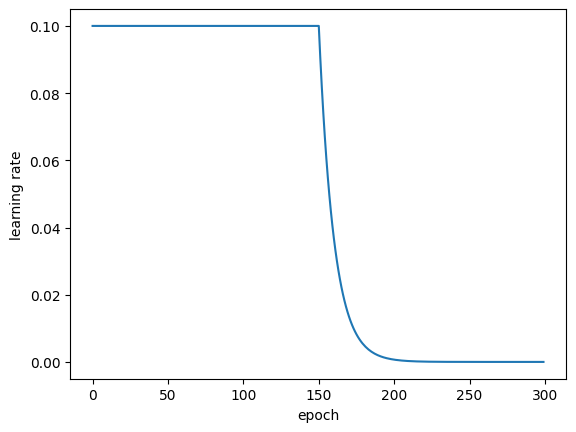

In [ ]:
x = np.arange(300)
expo_decay_schedule = make_expo_scheduler(150)

y = [expo_decay_schedule(i, 0.1) for i in x]
plt.plot(x, y)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.show()

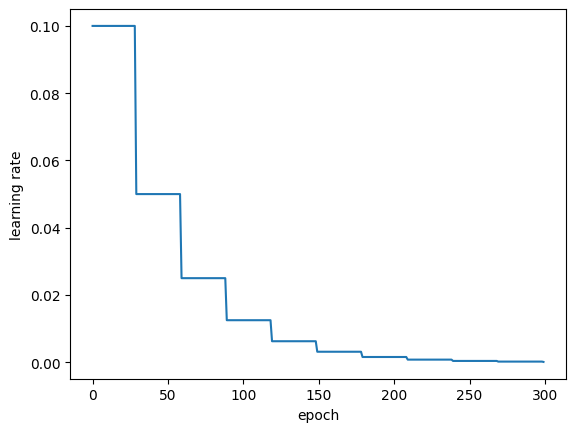

In [ ]:
x = np.arange(300)
step_decay_schedule = make_step_scheduler(0.5, 30)

y = [step_decay_schedule(i, 0.1) for i in x]
plt.plot(x, y)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.show()

In [ ]:
cube_decay_schedule = make_poly_scheduler(300, 3)
step_decay_schedule = make_step_scheduler(0.5, 30)
